In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [22]:
csco = yf.Ticker('CSCO')
data = csco.history(period='max')
data = data[['Close']].dropna()

In [23]:
data = data.loc['2017':]

In [24]:
data['Ret']= np.log(data.Close).diff()
data

,Close,Ret
Date,,
2017-01-03 00:00:00-05:00,25.343258,NaN
2017-01-04 00:00:00-05:00,25.192604,-0.005962
2017-01-05 00:00:00-05:00,25.251190,0.002323
2017-01-06 00:00:00-05:00,25.301411,0.001987
2017-01-09 00:00:00-05:00,25.259563,-0.001655
...,...,...
2022-10-18 00:00:00-04:00,41.790001,0.011795
2022-10-19 00:00:00-04:00,41.880001,0.002151
2022-10-20 00:00:00-04:00,41.709999,-0.004068


In [25]:
data = data.dropna()
data.tail()

,Close,Ret
Date,,
2022-10-18 00:00:00-04:00,41.790001,0.011795
2022-10-19 00:00:00-04:00,41.880001,0.002151
2022-10-20 00:00:00-04:00,41.709999,-0.004068
2022-10-21 00:00:00-04:00,42.799999,0.025797
2022-10-24 00:00:00-04:00,43.540001,0.017142


In [26]:
data.index[-1].date() + pd.Timedelta('1d')

datetime.date(2022, 10, 25)

In [27]:
time_window = '90d'
date_init = data.index[-1] + pd.Timedelta('1d')
time_index = pd.date_range(start=date_init, end=(date_init + pd.Timedelta(time_window)), freq='B')

In [28]:
mean_data = data.Ret.mean()
std_data = data.Ret.std()
data_montecarlo = pd.DataFrame(np.random.normal(
    loc=mean_data,
    scale=std_data,
    size=(len(time_index), 1000)),
    index=time_index)

In [29]:
data_montecarlo

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2022-10-25 00:00:00-04:00,-0.004335,0.000536,0.007408,-0.016332,0.006308,-0.012554,0.006320,-0.009448,0.024074,0.028457,...,0.034764,0.001334,-0.016048,-0.004072,-0.022296,0.003138,-0.006409,-0.012084,0.007593,-0.006400
2022-10-26 00:00:00-04:00,-0.018011,0.001760,-0.011217,0.014337,-0.005480,0.008705,0.014015,0.028808,0.009416,0.005992,...,-0.017188,-0.022202,0.012019,-0.026527,0.003717,-0.019313,0.025177,-0.009412,0.040298,0.015595
2022-10-27 00:00:00-04:00,0.016350,-0.007836,0.029638,0.008120,-0.001419,-0.001480,0.009670,0.002881,0.011127,-0.011933,...,-0.001332,-0.041528,-0.003913,-0.012081,0.036146,-0.011147,-0.000824,0.001529,-0.001078,-0.013976
2022-10-28 00:00:00-04:00,0.005996,-0.008900,-0.014831,-0.011693,0.007129,-0.001062,0.003342,0.007230,-0.006110,-0.025364,...,0.027910,-0.021213,-0.018467,0.001227,-0.015402,-0.017785,-0.007074,-0.009649,0.013725,0.010045
2022-10-31 00:00:00-04:00,0.010619,0.004071,-0.012674,0.011513,-0.015194,-0.023313,0.009806,0.019468,-0.017580,0.031080,...,0.020090,0.014823,-0.005201,-0.004922,-0.015208,0.007733,0.000281,0.005023,0.031869,-0.004149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-16 00:00:00-05:00,0.015409,-0.000722,-0.019166,0.007062,0.020333,0.025249,-0.020504,-0.022625,0.007316,0.022267,...,-0.011776,0.023498,0.011033,0.009620,0.019973,-0.019601,-0.008810,-0.022981,-0.013045,-0.023198
2023-01-17 00:00:00-05:00,0.024427,0.008572,-0.001617,-0.006603,-0.000884,-0.013086,-0.036286,-0.002076,-0.007902,-0.001364,...,-0.013023,0.015969,0.004261,0.003144,-0.011570,0.008288,-0.033983,0.004749,-0.044201,0.004189
2023-01-18 00:00:00-05:00,-0.022959,-0.025732,-0.017998,0.016017,-0.000351,0.002375,0.003220,0.019384,-0.002169,-0.034976,...,-0.012777,-0.010782,-0.010852,-0.007869,0.007367,0.013843,-0.016300,-0.035292,0.001536,-0.046038
2023-01-19 00:00:00-05:00,-0.026449,-0.028452,-0.008815,-0.009157,0.016312,0.018229,-0.005122,0.001798,-0.009093,0.004704,...,0.038026,0.009155,0.001033,-0.017200,0.008299,0.017704,0.001579,-0.040900,-0.014852,-0.002347


<AxesSubplot: >

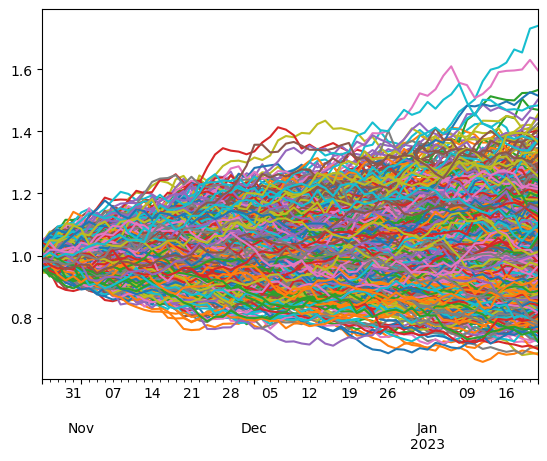

In [30]:
montecarlo_temp_evol = data_montecarlo.cumsum()
montecarlo_temp_evol = np.exp(montecarlo_temp_evol)
montecarlo_temp_evol.plot(legend=False)

<AxesSubplot: >

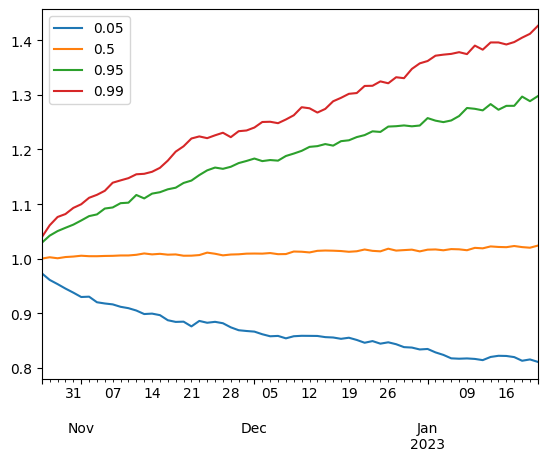

In [33]:
montecarlo_temp_evol.quantile(q=[0.05,0.5,0.95, 0.99],axis=1).T.plot()

In [65]:
bootstrap = np.random.choice(data.Ret, size=len(time_index)* 1000, replace=True).reshape(len(time_index), 1000)

--------------------------

# Carteras

In [66]:
symbols = ["MSFT","AAPL","GLD","SPY"]
tickers = yf.Tickers(symbols) 

In [67]:
data = tickers.history(start='2019-01-01',end='2020-06-29').Close.dropna()

[*********************100%***********************]  4 of 4 completed


In [73]:
rets = np.log(data).diff().dropna()

In [68]:
noa = len(symbols)

In [74]:
def pesos_aleatorios(noa):
    pesos = np.random.random(noa)
    pesos /= np.sum(pesos)
    return pesos

In [75]:
def port_ret(weights, rets):
    return np.dot(rets.mean().T *252, weights)

def port_vol(weights,rets):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [80]:
prets = [] 
pvols = [] 
pweights = []

In [81]:
for p in range (2500):
    weights = pesos_aleatorios(noa)
    prets.append(port_ret(weights,rets=rets))
    pvols.append(port_vol(weights,rets=rets))
    pweights.append(weights)

In [82]:
prets = np.array(prets) 
pvols = np.array(pvols)

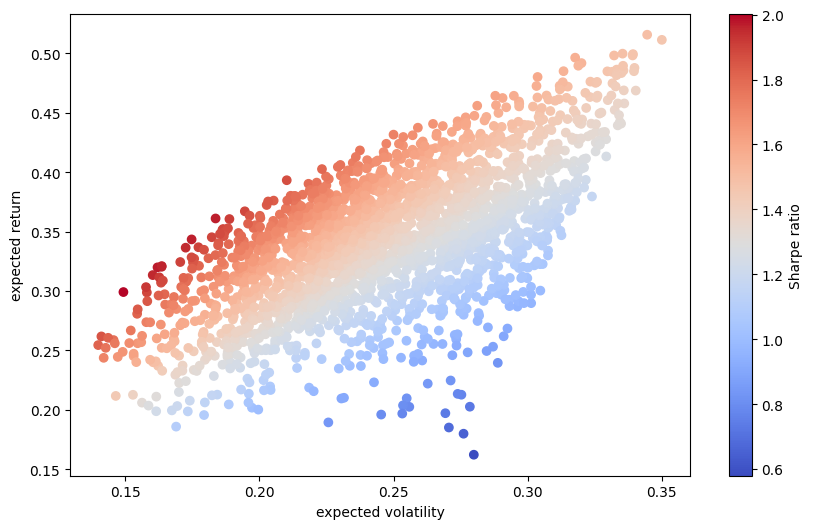

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [3]:
bonds_df = pd.read_csv('../8_ETTI/data/Bonds.csv', sep=';')
bonds_df

,Bond,Price,Maturity,Coupon
0,A,96.60,1,2.0
1,B,93.71,2,2.5
2,C,91.56,3,3.0
3,D,90.24,4,3.5
4,E,89.74,5,4.0
5,F,90.04,6,4.5
6,G,91.09,7,5.0
7,H,92.82,8,5.5
8,I,95.19,9,6.0
9,J,98.14,10,6.5


In [4]:
maturity_max = bonds_df['Maturity'].max()

In [5]:
array = []
for i in bonds_df.iterrows(): 
    # [Cupón en € tantas veces como Maturity -1] + [100+Cupón] + [Tantos '0' como diferencia entre maturity del bono y max maturity]
    x = [i[1][3]]*(i[1][2]-1)+[(100+i[1][3])] + [0]*(maturity_max-i[1][2]) # Sumar listas las concatena
    array.append(x)

cash_flows_df = pd.DataFrame(np.array(array))
cash_flows_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.5,102.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,3.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.5,3.5,3.5,103.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,4.0,4.0,4.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.5,4.5,4.5,4.5,4.5,104.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.0,5.0,5.0,5.0,5.0,5.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.5,5.5,5.5,5.5,5.5,5.5,5.5,105.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,106.5,0.0,0.0,0.0,0.0,0.0


In [6]:
cash_flows_inv_df = np.linalg.inv(cash_flows_df)
disc_factor = cash_flows_inv_df @ bonds_df['Price']
disc_factor

array([0.94705882, 0.89114491, 0.83539212, 0.7814726 , 0.72999737,
       0.68140865, 0.63578693, 0.59296268, 0.55300618, 0.51574181,
       0.48086164, 0.44840695, 0.41809328, 0.38980333, 0.36348408])

In [7]:
etti_df = pd.DataFrame()
etti_df['rates'] = (-100 * np.log(disc_factor)/bonds_df['Maturity'])
etti_df.index = bonds_df['Maturity']
etti_df


,rates
Maturity,
1,5.439407
2,5.762412
3,5.995135
4,6.164380
5,6.294287
6,6.393218
7,6.469883
8,6.532798
9,6.582068


<AxesSubplot: xlabel='Maturity'>

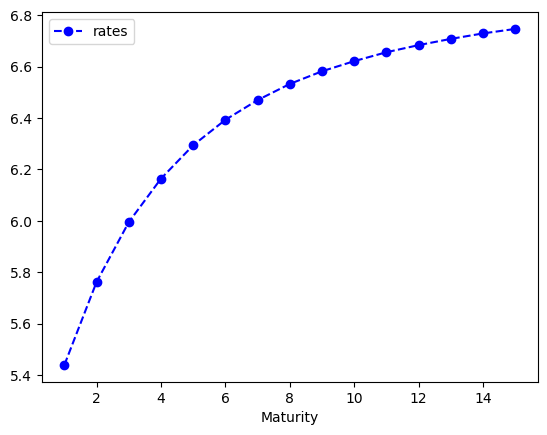

In [8]:
etti_df.plot(marker='o', linestyle='--', color='b')

In [9]:
def val_bono(coupon, maturity, discount):
    cash_flow = [coupon] * (maturity-1) + [100 + coupon] 
    return cash_flow @ discount[:len(cash_flow)]


In [ ]:
val_bono(3, 5, disc_factor)

85.55493417443927